<a href="https://www.kaggle.com/code/laytonprendy/pipeline-solution-no-pca-linear-regression?scriptVersionId=108178576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-based-on-cpi-20152020/WorldHappiness_Corruption_2015_2020.csv


         Country  happiness_score  gdp_per_capita    family    health  \
0         Norway           7.5370        1.616463  1.533524  0.796667   
1        Denmark           7.5220        1.482383  1.551122  0.792566   
2        Iceland           7.5040        1.480633  1.610574  0.833552   
3    Switzerland           7.4940        1.564980  1.516912  0.858131   
4        Finland           7.4690        1.443572  1.540247  0.809158   
..           ...              ...             ...       ...       ...   
787     Botswana           3.4789        0.997549  0.000000  0.494102   
788     Tanzania           3.4762        0.457163  0.000000  0.442678   
789       Rwanda           3.3123        0.343243  0.000000  0.572383   
790     Zimbabwe           3.2992        0.425564  0.000000  0.375038   
791  Afghanistan           2.5669        0.300706  0.000000  0.266052   

      freedom  generosity  government_trust  dystopia_residual continent  \
0    0.635423    0.362012          0.315964    

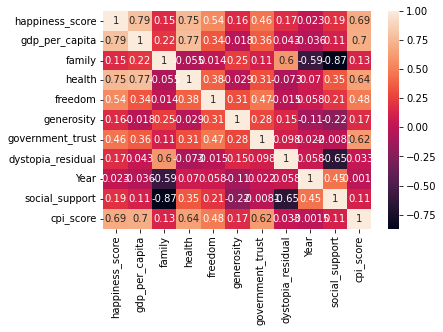

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')


In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/world-happiness-based-on-cpi-20152020/WorldHappiness_Corruption_2015_2020.csv')


        


#df=pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')#if using downloaded data
print(df)
print(df.head())
print(df.tail())

sns.heatmap(df.corr(),annot=True)
plt.show()

print(df.columns)



In [3]:
#now try to do PCA o take care of variation so regression can work more effectively
# 3 most are gdp_per_capita,health,cpi_score so I possibly reduce to 2 by PCA

##My First ML Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Train Test Split

target='happiness_score'
X_train, X_test, y_train, y_test = train_test_split(df[['gdp_per_capita','health','cpi_score']], df[target], random_state=0)
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 #('pca', PCA(n_components = 1, random_state=0)),#better without PCA which was unexpected
                 ('linear', LinearRegression())])

pipe.fit(X_train, y_train)

# Get Model Performance
print('Pipe Performance',pipe.score(X_test, y_test))


from sklearn import set_config

set_config(display='diagram')
print(pipe)
pipe
set_config(display='text')

Pipe Performance 0.6828966212230463
Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
